#**<u>RED NEURONAL</u>**

####Nuestra Red Neuronal cuenta con 2 capas, una oculta y una de salida, cada capa cuenta con 3 neuronas.
####Para la capa oculta elegimos la función de activación ReLu, dado que no tiene problemas de saturación y es más fácil de implementar, además de ser la más usada (según Google) para hacer redes neuronales.
####Para la capa de salida, primero (por inexperiencia) intentamos usar la función Logistic, pero al tener varias salidas, investigamos y (gracias también al profe que nos terminó de explicar y confirmar) usamos la función Softmax, la cual recibe varias entradas, las cuales las trata como probabilidades, hace sus matemáticas y obtiene una probabilidad por cada entrada (ente todas suman 1) y la que sea más cercana a 1 es la seleccionada como salida. Gracias a esta función, podemos obtener resultados esperados.


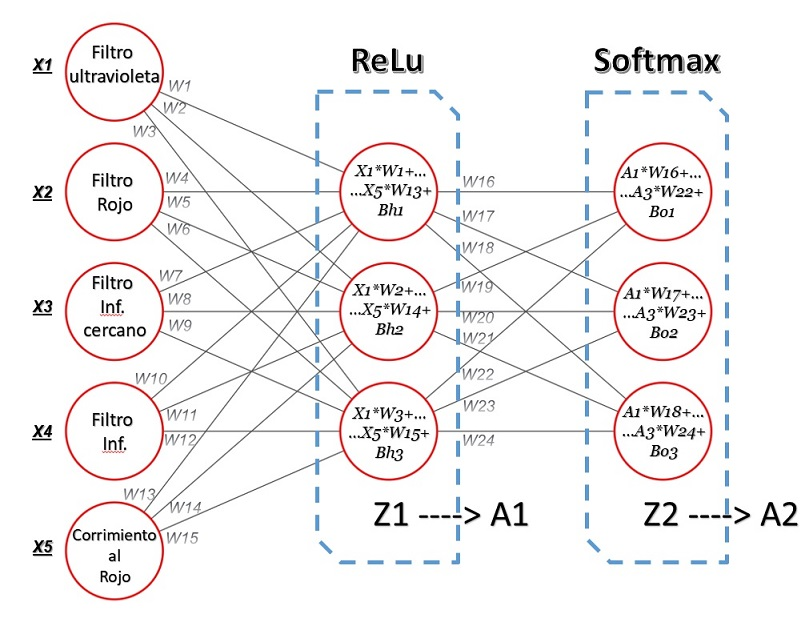

Número de registros de entrenamiento: 

62820 

Pre entrenamiento: 

Test

Aciertos:  48.5 

Train

Aciertos:  48.6 



  0%|          | 0/50000 [00:00<?, ?it/s]


Post entrenamiento: 

Test

Aciertos:  94.5 

Train

Aciertos:  94.7 



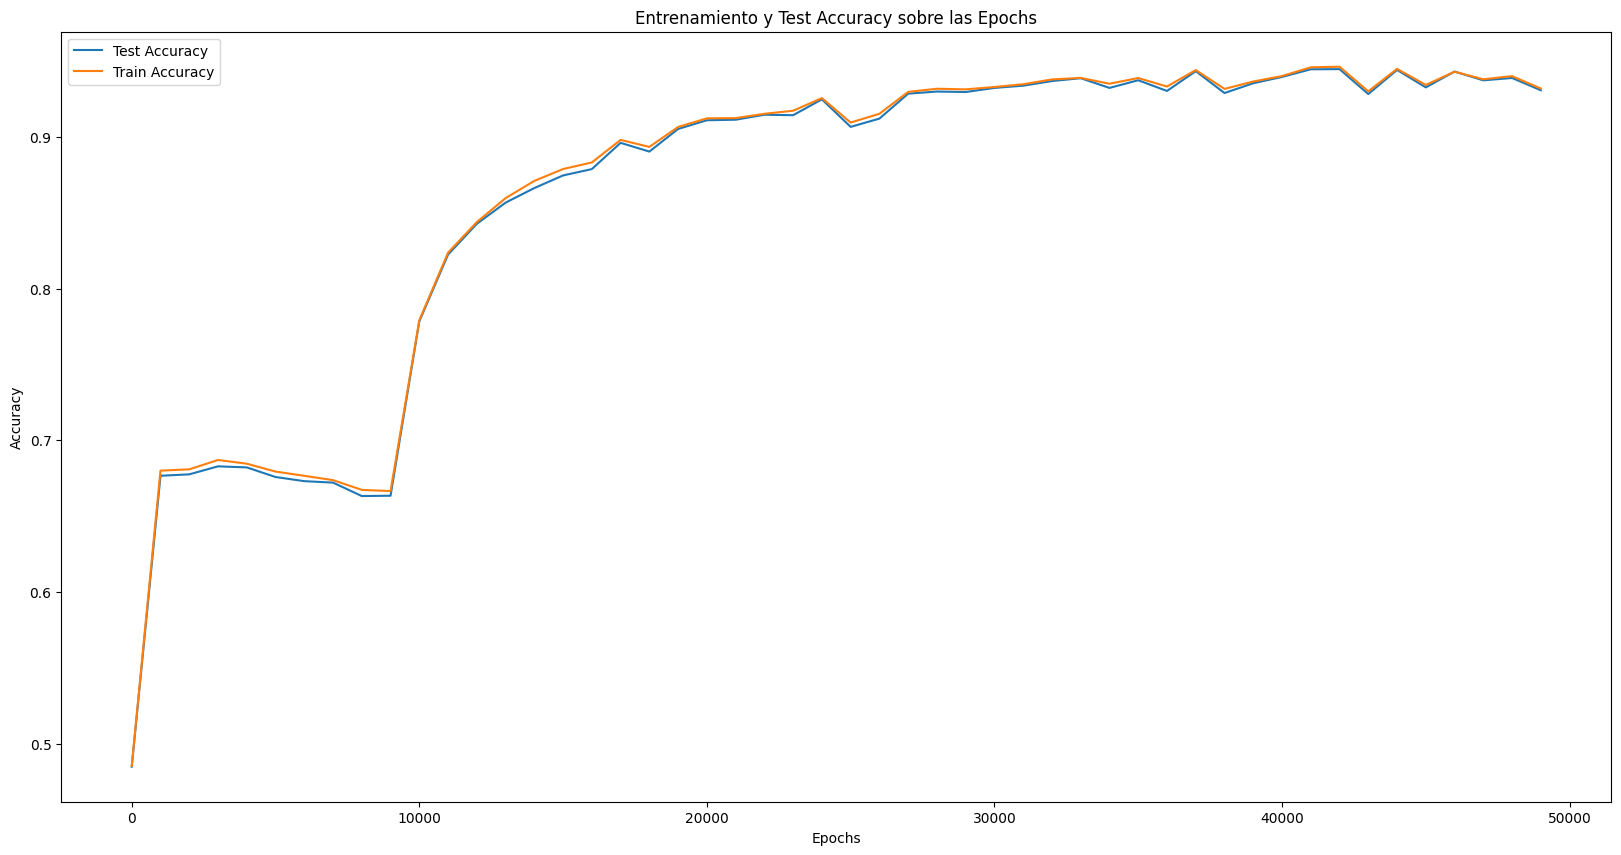

In [ ]:
# Con estocastico

# Llamado de las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

# Declaramos el dataFrame como all_data
df_limpio = pd.read_csv('https://raw.githubusercontent.com/casquifer/Mate-III/refs/heads/main/df_limpio.csv')

# Separamos los datos a tener en cuenta, por un lado los datos de entrada, por el otro los de salida ("class")
all_inputs = df_limpio.iloc[:, 0:5].values # Entradas: columnas 0 a 7
all_outputs = df_limpio.iloc[:, -1].values # Salidas: última columna

# Declaramos la funcion a utilizar para normalizar los datos
def normalizador(X):
    # Calculamos la media y la desviación estándar
    promedio = np.mean(X, axis=0)  # Promedio de cada columna
    desvEst = np.std(X, axis=0)    # Desviación estándar de c/c

    datoNormalizado = (X - promedio) / desvEst
    return datoNormalizado

all_inputs = normalizador(all_inputs)

### Convertir las salidas a formato one-hot

# Declaramos la cantidad de respuestas posibles
# Tener en cuenta que las salidas son 3
respPosibles = 3

# Con nume.eye(respPosibles) generamos una matriz identidad 3x3 que va a reemplazar a los valores (0,1,2) originales
# Al combinarla con all_outputs vinculamos cada fila de la MId con cada valor
# La primer fila sería 0, la segunda 1, y la tercera 2
# Hacemos esto para poder trabajar las 3 posibilidades dentro de la red.
y_matriz = np.eye(respPosibles)[all_outputs]

# Matriz --- Clase a la que apunta la fila

# 1, 0, 0 --- 0
# 0, 1, 0 --- 1
# 0, 0 ,1 --- 2

# Dividir en un conjunto de entrenamiento y uno de prueba
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, y_matriz, test_size=1/3)

n = X_train.shape[0]  # número de registros de entrenamiento

print('Número de registros de entrenamiento: \n')
print(n, '\n')

### Funciones de activación

# Función ReLu
relu = lambda x: np.maximum(x, 0)


#*******************Dado que vamos a tener 3 resultados posibles, decidimos usar la función Softmax que aplica mejor a estos casos************************************

#Softmax: recibe una matriz de "x" valores y los convierte en probabilidades, donde cada valor está entre 0 y 1.
# La suma de todas estas probabilidades es igual a 1, por eso la que mas se acerca a 1 es a opción elegida como salida

#Expresión matemática de la Softmax: "e" elevado a la "Zi" / sumatoria K j=1 "e" elevado a la "Zj"

#np.exp(x): calcula la función exponencial de cada elemento en x. Devueve "e" a la "x"
#np.max(x, axis=0, keepdims=True): encuentra el valor máximo en x a lo largo del eje especificado (en este caso es 0) y "keepdims" mantienen las dimensiones originaes
#np.sum(exp_x, axis=0, keepdims=True): calcula la suma de los valores en "exp" en el eje 0 y mantiene las dimensiones originales

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

### Construimos la red neuronal con pesos y sesgos iniciados aleatoriamente
# Primero determinamos un seed para controlar los valores random

np.random.seed(5429)

w_hidden = (np.random.rand(3, 5) * 2) - 1 # Pesos de la capa oculta (3 neuronas, 5 entradas)
w_output = (np.random.rand(3, 3) * 2) - 1 # Pesos de la capa de salida (3 clases, 3 neuronas ocultas)

b_hidden = (np.random.rand(3, 1) * 2) - 1 # Biases de la capa oculta (3 neuronas)
b_output = (np.random.rand(3, 1) * 2) - 1 # Biases de la capa de salida (3 clases)

# Función del forward para recorrer la red de atrás para adelante
def forward_prop(X):
    #Z1 = w_hidden @ X.T + b_hidden
    Z1 = w_hidden @ X.T + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Función para deteminar el accuracy
def accuracy(X, Y):
    test_predictions = forward_prop(X)[3]
    predicted_classes = np.argmax(test_predictions, axis=0)  # Obtener clase con mayor prob
    true_classes = np.argmax(Y, axis=1)
    accuracy = np.mean(predicted_classes == true_classes)
    print("Aciertos: ", (accuracy * 100).round(1), "\n")

# Printeamos el accuracy que generamos con el forward
print('Pre entrenamiento: \n')
print('Test\n')
accuracy(X_test, Y_test)
print('Train\n')
accuracy(X_train, Y_train)

# Creamos 2 listas para guardar los resultados, para luego imprimir el gráfico
conteoTest = []
conteoTrain = []

# Cálculo de precisión
def accuracyTest(X, Y):
    test_predictions = forward_prop(X)[3]  # solo nos interesa A2
    predicted_classes = np.argmax(test_predictions, axis=0)  # obtener clase con mayor probabilidad
    true_classes = np.argmax(Y, axis=1)  # etiquetas verdaderas
    accuracy = np.mean(predicted_classes == true_classes)  # porcentaje de aciertos
    # print("Porcentaje de aciertos: ", (accuracy * 100).round(2))
    conteoTest.append(accuracy)

def accuracyTrain(X, Y):
    test_predictions = forward_prop(X)[3]  # solo nos interesa A2
    predicted_classes = np.argmax(test_predictions, axis=0)  # obtener clase con mayor probabilidad
    true_classes = np.argmax(Y, axis=1)  # etiquetas verdaderas
    accuracy = np.mean(predicted_classes == true_classes)  # porcentaje de aciertos
    # print("Porcentaje de aciertos: ", (accuracy * 100).round(2))
    conteoTrain.append(accuracy)

### Devuelve pendientes para pesos y sesgos usando la regla de la cadena
# Derivada de ReLU
def d_relu(Z):
    return (Z > 0)

# Derivada de softmax
def d_softmax(muestra):
    s = muestra.reshape(-1, 1) # Convierte el vector de salida en una columna
    #reshape(-1,1): cambia la forma de "muestra" de un vector (n) a (n,1) y al pasarle "-1", numpy calcula automáticamente el tamaño apropiado para la primera dimensión
    return np.diagflat(s) - np.dot(s, s.T) # Matriz diagonal menos el producto externo
    #diagflat(s): crea una matriz diagonal, en la que los valores diagonales son valores del vector "s"
    #dot(s, s.t): calcula el producto externo de "s" con "s" traspuesta
    #np.diagflat(s) - np.dot(s, s.T): la finalidad de esta resta, es calcular la matriz Jocobiana de Softmax

#**********Al usar la Softmax como función de salida, es recomendable usar el Cross Entropy para calcular el error**********************
#Cross Entropy: se usa para medir la diferencia entre la distribución real (valores esperados) y la distribución predicha (las probabilidades que la red cacula con Softmax)

#Expresión matemática de la Cross Entropy: - (sumatoria de Y)(log(S))
#Derivada de Cross Entropy: S - Y
         #((3,1),(3,1),(3,1),(3,1),(1,5),(3,1))
def backward_prop(Z1, A1, Z2, A2, X, Y):

    dC_dA2 = A2 - Y.T  # (3, 1)
    dA2_dZ2 = d_softmax(A2)  # (3, 3)
    dZ2_dA1 = w_output  # (3, 3)
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)  # (3, 1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dA2_dZ2 @ dC_dA2  @ dZ2_dW2.T
    dC_dB2 = dA2_dZ2 @ dC_dA2
    dC_dA1 = dZ2_dA1 @ dA2_dZ2 @ dC_dA2
    dC_dW1 = dC_dA1 * dA1_dZ1 @ dZ1_dW1
    dC_dB1 = dC_dA1 * dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# La tasa de aprendizaje
L = 0.01

# Ejecutar descenso de gradiente estocástico
epochs = 50000

for i in tqdm(range(epochs)):
    idx = np.random.randint(0, n)  # Elegir un solo índice aleatorio
    X_sample = X_train[idx:idx+1]  # Obtener el ejemplo
    Y_sample = Y_train[idx:idx+1]  # Obtener la etiqueta correspondiente
    Z1, A1, Z2, A2 = forward_prop(X_sample)
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)
    # Actualizamos los pesos y biases
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

    # Cada 1000 épocas, almacenamos precisión en test y train
    if i % 1000 == 0:
        accuracyTrain(X_train, Y_train)  # Calcula precisión en entrenamiento
        accuracyTest(X_test, Y_test)    # Calcula precisión en prueba


# Cálculo de precisión
print('\nPost entrenamiento: \n')
print('Test\n')
accuracy(X_test, Y_test)
print('Train\n')
accuracy(X_train, Y_train)

# Graficamos los resultados
plt.figure(figsize=(20, 10))
plt.plot(range(0, epochs, 1000), conteoTest, label="Test Accuracy")
plt.plot(range(0, epochs, 1000), conteoTrain, label="Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Entrenamiento y Test Accuracy sobre las Epochs")
plt.legend()
plt.show()

####Luego de realizar nuestra Red Neuronal, viendo el porcentaje de aciertos y el gráfico, nos preguntamos, ¿estamos cayendo en Overfitting?

####Para poder responder esta pregunta, primero entendamos que es Overfitting. El Overfitting (Sobreajuste) es el efecto de sobreentrenar la Red Neuronal, en otras palabras, hacer que nuestra Red Neuronal "memorice" los resultados y se sobreajuste a la hora de devolver resultados.
<br><br>
####¿Cómo lo detectamos?

####Una manera es viendo si el porcentaje de aciertos del entrenamiento es significativamente mayor al del conjunto de test y si esta diferencia se incrementa a medida que aumentamos las épocas. O también si observamos que el test se estabiliza y el entrenamiento aumenta, es otra señal de la presencia de Overfitting.
<br><br>
####¿Qué maneras tenemos para prevenir o comprobar si estamos cayendo en Overfitting?

####Hay varios métodos para prevenir o comprobar si estamos en presencia de Overfitting:

####-Dropout: consiste en desactivar algunas neuronas aleatoriamente durante el entrenamiento, esto ayuda a no depender de neuronas específicas.

####-Reducir la complejidad de la Red Neuronal: una forma es reducir la cantidad de neuronas en la capa oculta para evitar que la Red Neuronal aprenda demasiado sobre datos específicos.

####-Ajustar el número de épocas: reducir la cantidad de veces que itera nuestra red, nos ayuda a evitar que se siga entrenando una vez que dejó de mejorar el test.

####-Aumentar la cantidad de datos: al tener más muestras, se reduce la posibilidad de generalizar y caer en el Overfitting.

####Al observar nuestra Red Neuronal, decidimos aplicar 2 de estas técnicas para chequear si estamos en presencia de Overfitting: reducir la complejidad de la red y ajustar el número de épocas.

<br><br>
####En este caso redujimos a 2 las neuronas de la capa oculta y a 25000 las épocas:


  0%|          | 0/25000 [00:00<?, ?it/s]


Post entrenamiento: 

Test

Aciertos:  94.3 

Train

Aciertos:  94.2 



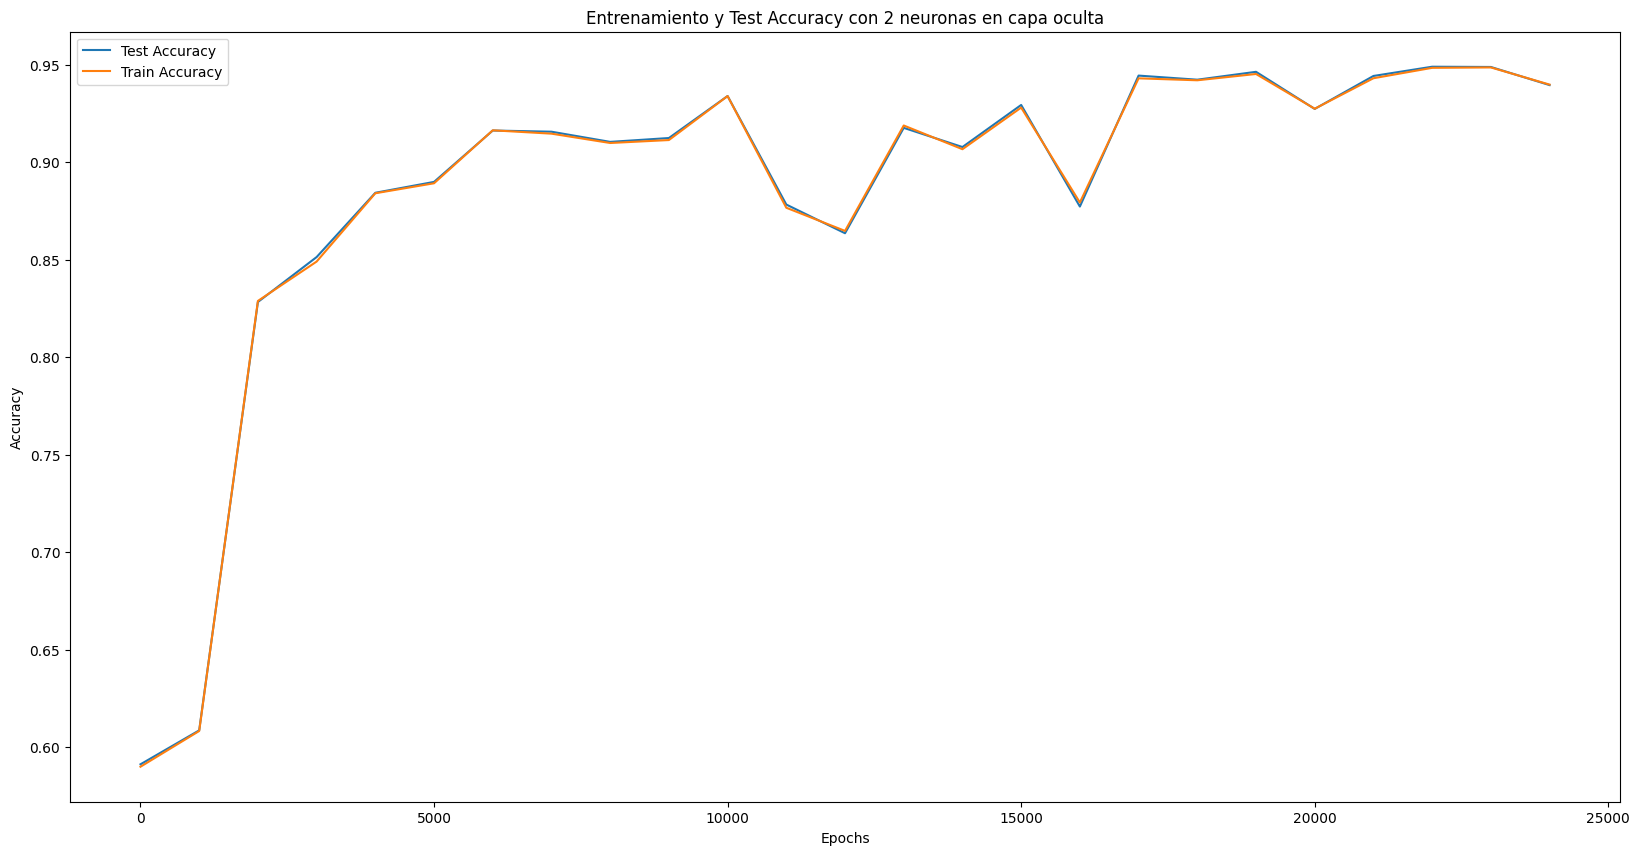

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

df_limpio = pd.read_csv('https://raw.githubusercontent.com/casquifer/Mate-III/refs/heads/main/df_limpio.csv')
all_inputs = df_limpio.iloc[:, 0:5].values
all_outputs = df_limpio.iloc[:, -1].values

def normalizador(X):
    promedio = np.mean(X, axis=0)
    desvEst = np.std(X, axis=0)
    return (X - promedio) / desvEst

all_inputs = normalizador(all_inputs)

respPosibles = 3
y_matriz = np.eye(respPosibles)[all_outputs]

X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, y_matriz, test_size=1/3)
n = X_train.shape[0]

relu = lambda x: np.maximum(x, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)


np.random.seed(5429)

# Iniciamos los pesos y sesgos con un número menor de neuronas en la capa oculta (2)
w_hidden = (np.random.rand(2, 5) * 2) - 1  # 2 neuronas en capa oculta, 5 entradas
w_output = (np.random.rand(3, 2) * 2) - 1  # 3 clases, 2 neuronas en capa oculta

b_hidden = (np.random.rand(2, 1) * 2) - 1  # Biases de la capa oculta (2 neuronas)
b_output = (np.random.rand(3, 1) * 2) - 1  # Biases de la capa de salida (3 clases)

def forward_prop(X):
    Z1 = w_hidden @ X.T + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def accuracy(X, Y):
    test_predictions = forward_prop(X)[3]
    predicted_classes = np.argmax(test_predictions, axis=0)
    true_classes = np.argmax(Y, axis=1)
    accuracy = np.mean(predicted_classes == true_classes)
    print("Aciertos: ", (accuracy * 100).round(1), "\n")

conteoTest = []
conteoTrain = []

def accuracyTest(X, Y):
    test_predictions = forward_prop(X)[3]
    predicted_classes = np.argmax(test_predictions, axis=0)
    true_classes = np.argmax(Y, axis=1)
    accuracy = np.mean(predicted_classes == true_classes)
    conteoTest.append(accuracy)

def accuracyTrain(X, Y):
    test_predictions = forward_prop(X)[3]
    predicted_classes = np.argmax(test_predictions, axis=0)
    true_classes = np.argmax(Y, axis=1)
    accuracy = np.mean(predicted_classes == true_classes)
    conteoTrain.append(accuracy)

def d_relu(Z):
    return (Z > 0)

def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = A2 - Y.T
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dA1_dZ1 = d_relu(Z1)

    dC_dW2 = dC_dA2 @ dZ2_dW2.T
    dC_dA1 = dZ2_dA1.T @ dC_dA2
    dC_dW1 = (dC_dA1 * dA1_dZ1) @ X
    dC_dB2 = dC_dA2
    dC_dB1 = dC_dA1 * dA1_dZ1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

L = 0.01
epochs = 25000

for i in tqdm(range(epochs)):
    idx = np.random.randint(0, n)
    X_sample = X_train[idx:idx+1]
    Y_sample = Y_train[idx:idx+1]
    Z1, A1, Z2, A2 = forward_prop(X_sample)
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

    if i % 1000 == 0:
        accuracyTrain(X_train, Y_train)
        accuracyTest(X_test, Y_test)

print('\nPost entrenamiento: \n')
print('Test\n')
accuracy(X_test, Y_test)
print('Train\n')
accuracy(X_train, Y_train)

plt.figure(figsize=(20, 10))
plt.plot(range(0, epochs, 1000), conteoTest, label="Test Accuracy")
plt.plot(range(0, epochs, 1000), conteoTrain, label="Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Entrenamiento y Test Accuracy con 2 neuronas en capa oculta")
plt.legend()
plt.show()


####Como podemos observar, los resultados de aciertos y los gráficos son bastantes similares, ambos muestran un rápido aprendizaje trabajando tanto con 3 o 2 neuronas en la capa oculta y con 50000 y 25000 épocas.

####Si reducimos las épocas a menos de 50000 en la red de 3 neuronas, el porcentaje de aciertos comienza a descender, por lo que entendemos que no está memorizando los resultados por cantidad de épocas.

####Dado que el segundo modelo con menos neuronas y menos épocas, obtuvo resultados similares podemos deducir que el primer modelo no presenta una tendencia al Overfitting. Finalmente podemos entender que también podría funcionar nuestra red con menos recursos, dado que los datos que maneja no son de alta complejidad.


####Red hecha con Scikit-Learn:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df_limpio = pd.read_csv('https://raw.githubusercontent.com/casquifer/Mate-III/refs/heads/main/df_limpio.csv')

# Extraer variables de entrada (todas las filas, todas las columnas menos de "class")
X = (df_limpio.values[:, :-1])

# Extraer columna de salida (todas las filas, columna "class")
Y = df_limpio.values[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

#red
nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=50_000,
                   learning_rate_init=.01)

#entrenamiento
nn.fit(X_train, Y_train)

print("Porcentaje de aciertos con train: ", (nn.score(X_train, Y_train)*100))
print("Porcentaje de aciertos con test: ", (nn.score(X_test, Y_test)*100))

Porcentaje de aciertos con train:  95.96466093600765
Porcentaje de aciertos con test:  96.03311047437121


##Comparación con Scikit-Learn

####Como podemos observar, los resultados de ambas redes son bastante similares, al igual que el tiempo de ejecución. Si bien scikit le saca un puntito de ventaja, de buenas primeras no estamos en condiciones de saber si está cayendo en un overfitting. Tampoco podemos controlar que funciones usa internamente. Por otro lado vemos la simpleza con la que obtenemos resultados, casi que podríamos decir que una persona que no sabe cómo funciona una red neuronal por dentro, puede crearse una, siempre y cuando tenga las herramientas adecuadas.

<br><br>

##**Conclusión Final**

####En este hermoso viaje de crear una Red Neuronal desde cero, hemos aprendido a estudiar un data frame, a saber cómo observarlo y analizarlo a fondo. Primero analizando sus datos columna a columna, determinando que variables no son útiles y cuales nos llevarían a complicaciones, como por ejemplo los datos atípicos. Pasando por la normalización de los datos hasta analizar los histogramas. Con estas detecciones y análisis podríamos saber si aplicamos o no un recorte de cuartiles a nuestro data frame, para poder emprolijarlo lo más posible. Finalmente analizamos las correlaciones entre los datos y la columna de salida, para poder dar esa última limpieza al data frame con el fin dejarlo listo para poder crear una Red Neuronal.

####Como ya comparamos antes, podemos poner en una balanza los pros y contras de ambas formas de crear una Red Neuronal, pero a nuestro criterio, siempre es mejor tener el control total de lo que uno está haciendo. Es por eso que no nos conformamos con la comodidad de una librería (que vaya uno a saber que cálculos y uso del CPU haga) y elegimos hacer las cosas a mano, entendiendo y controlando todo lo que pasa dentro de nuestra Red Neuronal.

####En resumen, hemos aprendido mucho sobre el análisis y limpieza de data frames y sobre la construcción y análisis de Redes Neuronales.


<br><br>


###**Autores**
###CASCO, Rodrigo
###GÓMEZ CIRANA, Jonathan